In [1]:
from pathlib import Path
from PIL import Image, ImageDraw, ImageFont
from collections import Counter
from dataclasses import dataclass
import random
import math
from wrdcld.font import get_default_font_path
from wrdcld.rectangle import Rectangle
import numpy as np

In [2]:
img = Image.new('RGB', (500,500), color = (73, 109, 137))
canvas = ImageDraw.Draw(img)

text = "hello"
size = 30

font = ImageFont.truetype(get_default_font_path(), size)

bbox = font.getbbox(text)

text_dims = (bbox[2] - bbox[0], 2*(bbox[3] - bbox[1]))

tmp_img = Image.new('RGB', text_dims,color = (0,0,0))
tmp_canvas = ImageDraw.Draw(tmp_img)




tmp_canvas.text(
    (0,0), 
    text,
    fill=(255,255,255),
    font=font,
)

img_data = np.array(tmp_img)[:,:,0]

img_data[0,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=uint8)

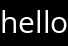

In [3]:
tmp_img

In [4]:
img_data.shape

(46, 68)

In [5]:
# completed_rectangles = []
# active_rectangles = [Rectangle(x=0,y=0, width=img_data.shape[1], height=0)]
# base_value = 0
# min_rectangle_width = 3
# for ind, img_row in enumerate(img_data):
    
#     new_active_rectangles = []
#     for rect in active_rectangles:
        
#         # rectangle isn't done yet
#         if np.all(img_row[rect.x: rect.x+rect.width] == base_value):
#             new_active_rectangles.append(Rectangle(x=rect.x, y=rect.y, width=rect.width, height=rect.height+1))
#         elif rect.height == 0:
#             continue
#         # make the new rectangles
#         else:
#             completed_rectangles.append(rect)
#             # find the new rectangles to start
#             new_left = []
#             new_right = []
#             new_rect_active = False
#             for col_ind, val in enumerate(img_row):
#                 if val == base_value and not new_rect_active:
#                     new_rect_active = True
#                     new_left.append(col_ind + rect.x)
#                 elif new_rect_active and val != base_value:
#                     new_rect_active = False
#                     new_right.append(col_ind + rect.x)
#                 else:
#                     continue

#             if new_rect_active:
#                 new_right.append(rect.x + rect.width)

#             for left, right in zip(new_left, new_right, strict=True):
#                 if right - left < min_rectangle_width:
#                     continue
#                 new_active_rectangles.append(Rectangle(x=left, y=ind, width=right-left, height=0))

#     active_rectangles = new_active_rectangles

# completed_rectangles.extend(active_rectangles)

In [117]:
text = "hello"
size = 30

font = ImageFont.truetype(get_default_font_path(), size)

bbox = font.getbbox(text)

text_dims = (bbox[2] - bbox[0], 2*(bbox[3] - bbox[1]))

tmp_img = Image.new('RGB', text_dims,color = (0,0,0))
tmp_canvas = ImageDraw.Draw(tmp_img)

np.array(tmp_img.quantize())


tmp_canvas.text(
    (0,0), 
    text,
    fill=(255,255,255),
    font=font,
)

img_data = np.array(tmp_img.quantize(2))


rectangles = [Rectangle(x=0,y=0, width=img_data.shape[1], height=0)]
base_value = img_data[0,0]
min_rectangle_side_length = 3
for row_ind, img_row in enumerate(img_data):
    # find the gaps between the letters
    left_inds = []
    right_inds = []
    new_rect_active = False
    for col_ind, val in enumerate(img_row):
        if val == base_value and not new_rect_active:
            new_rect_active = True
            left_inds.append(col_ind)
        elif new_rect_active and val != base_value:
            new_rect_active = False
            right_inds.append(col_ind)
        else:
            continue

    if new_rect_active:
        right_inds.append(img_data.shape[1])

    new_rectangles = []
    for left_ind, right_ind in zip(left_inds, right_inds, strict=True):
        # if the rectangle is too small
        if right_ind - left_ind < min_rectangle_side_length:
            continue
        # if this is a continuation of an existing rectangle
        extended = False
        for rect_ind, rectangle in enumerate(rectangles):
            if rectangle.bottom == row_ind and rectangle.x == left_ind and rectangle.right == right_ind:
                rectangles[rect_ind] = Rectangle(x=rectangle.x, y=rectangle.y, width=rectangle.width, height=rectangle.height+1)
                extended = True

        if not extended:
            new_rectangles.append(Rectangle(x=left_ind, y=row_ind, width=right_ind-left_ind, height=1))

    rectangles += new_rectangles

rectangles = [rectangle for rectangle in rectangles if rectangle.height >= min_rectangle_side_length]

    

In [118]:
for rectangle in rectangles:
    tmp_canvas.rectangle(rectangle.xyrb)

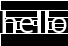

In [119]:
tmp_img

In [120]:
rectangles

[Rectangle(x=0 y=0 w=68 h=10),
 Rectangle(x=5 y=10 w=32 h=7),
 Rectangle(x=40 y=10 w=5 h=23),
 Rectangle(x=48 y=10 w=20 h=7),
 Rectangle(x=33 y=20 w=4 h=5),
 Rectangle(x=16 y=21 w=4 h=8),
 Rectangle(x=48 y=21 w=4 h=8),
 Rectangle(x=5 y=22 w=8 h=11),
 Rectangle(x=54 y=23 w=10 h=4),
 Rectangle(x=0 y=33 w=68 h=13)]

In [95]:
rectangles

[Rectangle(x=0 y=0 w=68 h=10),
 Rectangle(x=5 y=10 w=32 h=7),
 Rectangle(x=40 y=10 w=5 h=23),
 Rectangle(x=48 y=10 w=20 h=7),
 Rectangle(x=33 y=20 w=4 h=5),
 Rectangle(x=16 y=21 w=4 h=8),
 Rectangle(x=48 y=21 w=4 h=8),
 Rectangle(x=5 y=22 w=8 h=11),
 Rectangle(x=54 y=23 w=10 h=4),
 Rectangle(x=0 y=33 w=68 h=13)]

In [96]:
np.array(tmp_img.getdata())[:,0]

array([255, 255, 255, ...,  73,  73,  73])

In [97]:
img_data.T

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)